# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import rpy2

In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load the DC cells

In [4]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig2c_myeloid_dc_dr_20200416.h5ad")

In [5]:
adata.shape

(4090, 33712)

In [6]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC                        92
MPP myeloid 1              46
MPP myeloid 2              46
MPP lymphoid               34
ELP                      1358
pDC progenitor             23
pDC                       713
tDC                       193
myeloid DC progenitor      31
DC precursor              201
DC1                        50
DC2                       598
DC3                       705
dtype: int64

# Get monocle3 metadata and save into DC cell obj

In [7]:
metadata = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/myeloid_dc_monocle3_pst_metadata_20200420.csv")
metadata.index=metadata["Unnamed: 0"]
metadata[:5]

,Unnamed: 0,cell_color
Unnamed: 0,,
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_AAGGAGCGTGAGTATA,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_AAG...,29004.890009
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ACATACGGTAAATGAC,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ACA...,9925.745779
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_CCGTTCAAGACTAGGC,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_CCG...,28629.834636
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_GTACTCCCAATCTGCA,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_GTA...,6495.860497
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_TTAACTCAGGCAGTCA,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_TTA...,6063.136327


In [8]:
metadata.columns

Index(['Unnamed: 0', 'cell_color'], dtype='object')

In [9]:
adata.obs["monocle3_pst_val"] = metadata["cell_color"]
adata.obs["monocle3_pst_val"] = adata.obs["monocle3_pst_val"].replace(np.inf, np.nan)

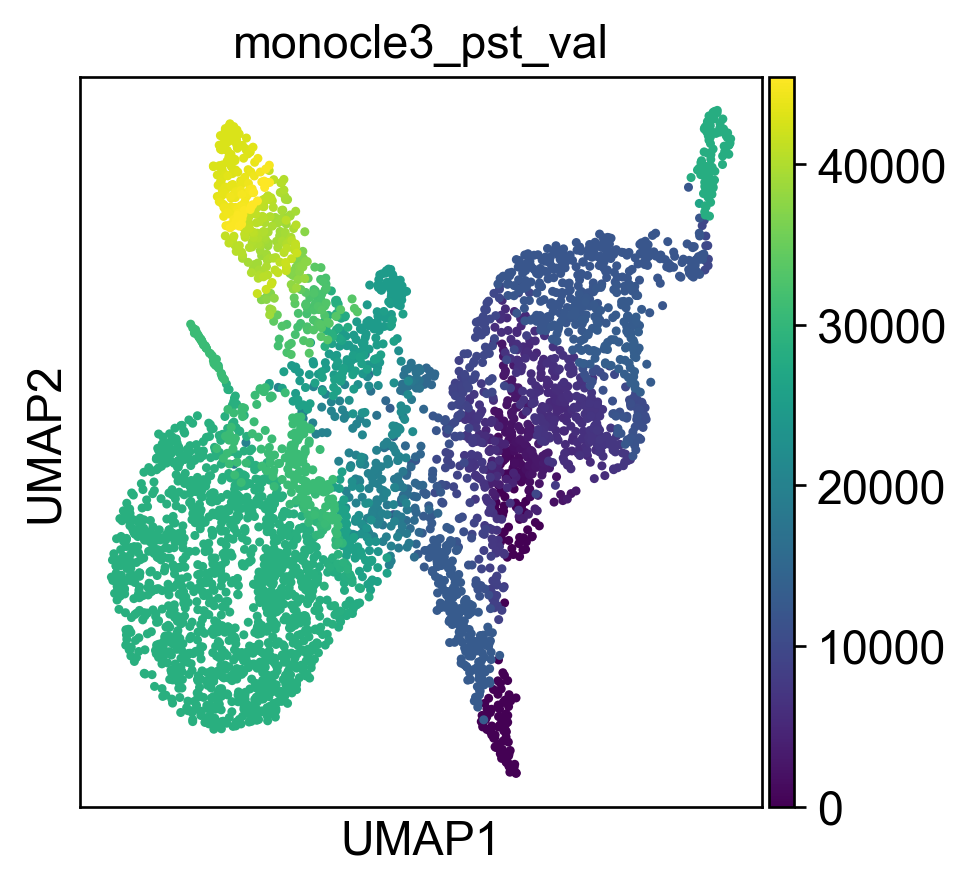

In [10]:
sc.pl.umap(adata, color="monocle3_pst_val")

In [11]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig2c_myeloid_dc_dr_20200416.h5ad")

# Run plots for genes over pseudotime

In [7]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import rpy2

In [8]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [10]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig2c_myeloid_dc_dr_20200416.h5ad")

# Plot path 1 heatmap

In [107]:
genes = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/fig2c_dc_monocle_path1_heatmap.csv")
genes_path1 = genes["gene"].tolist()

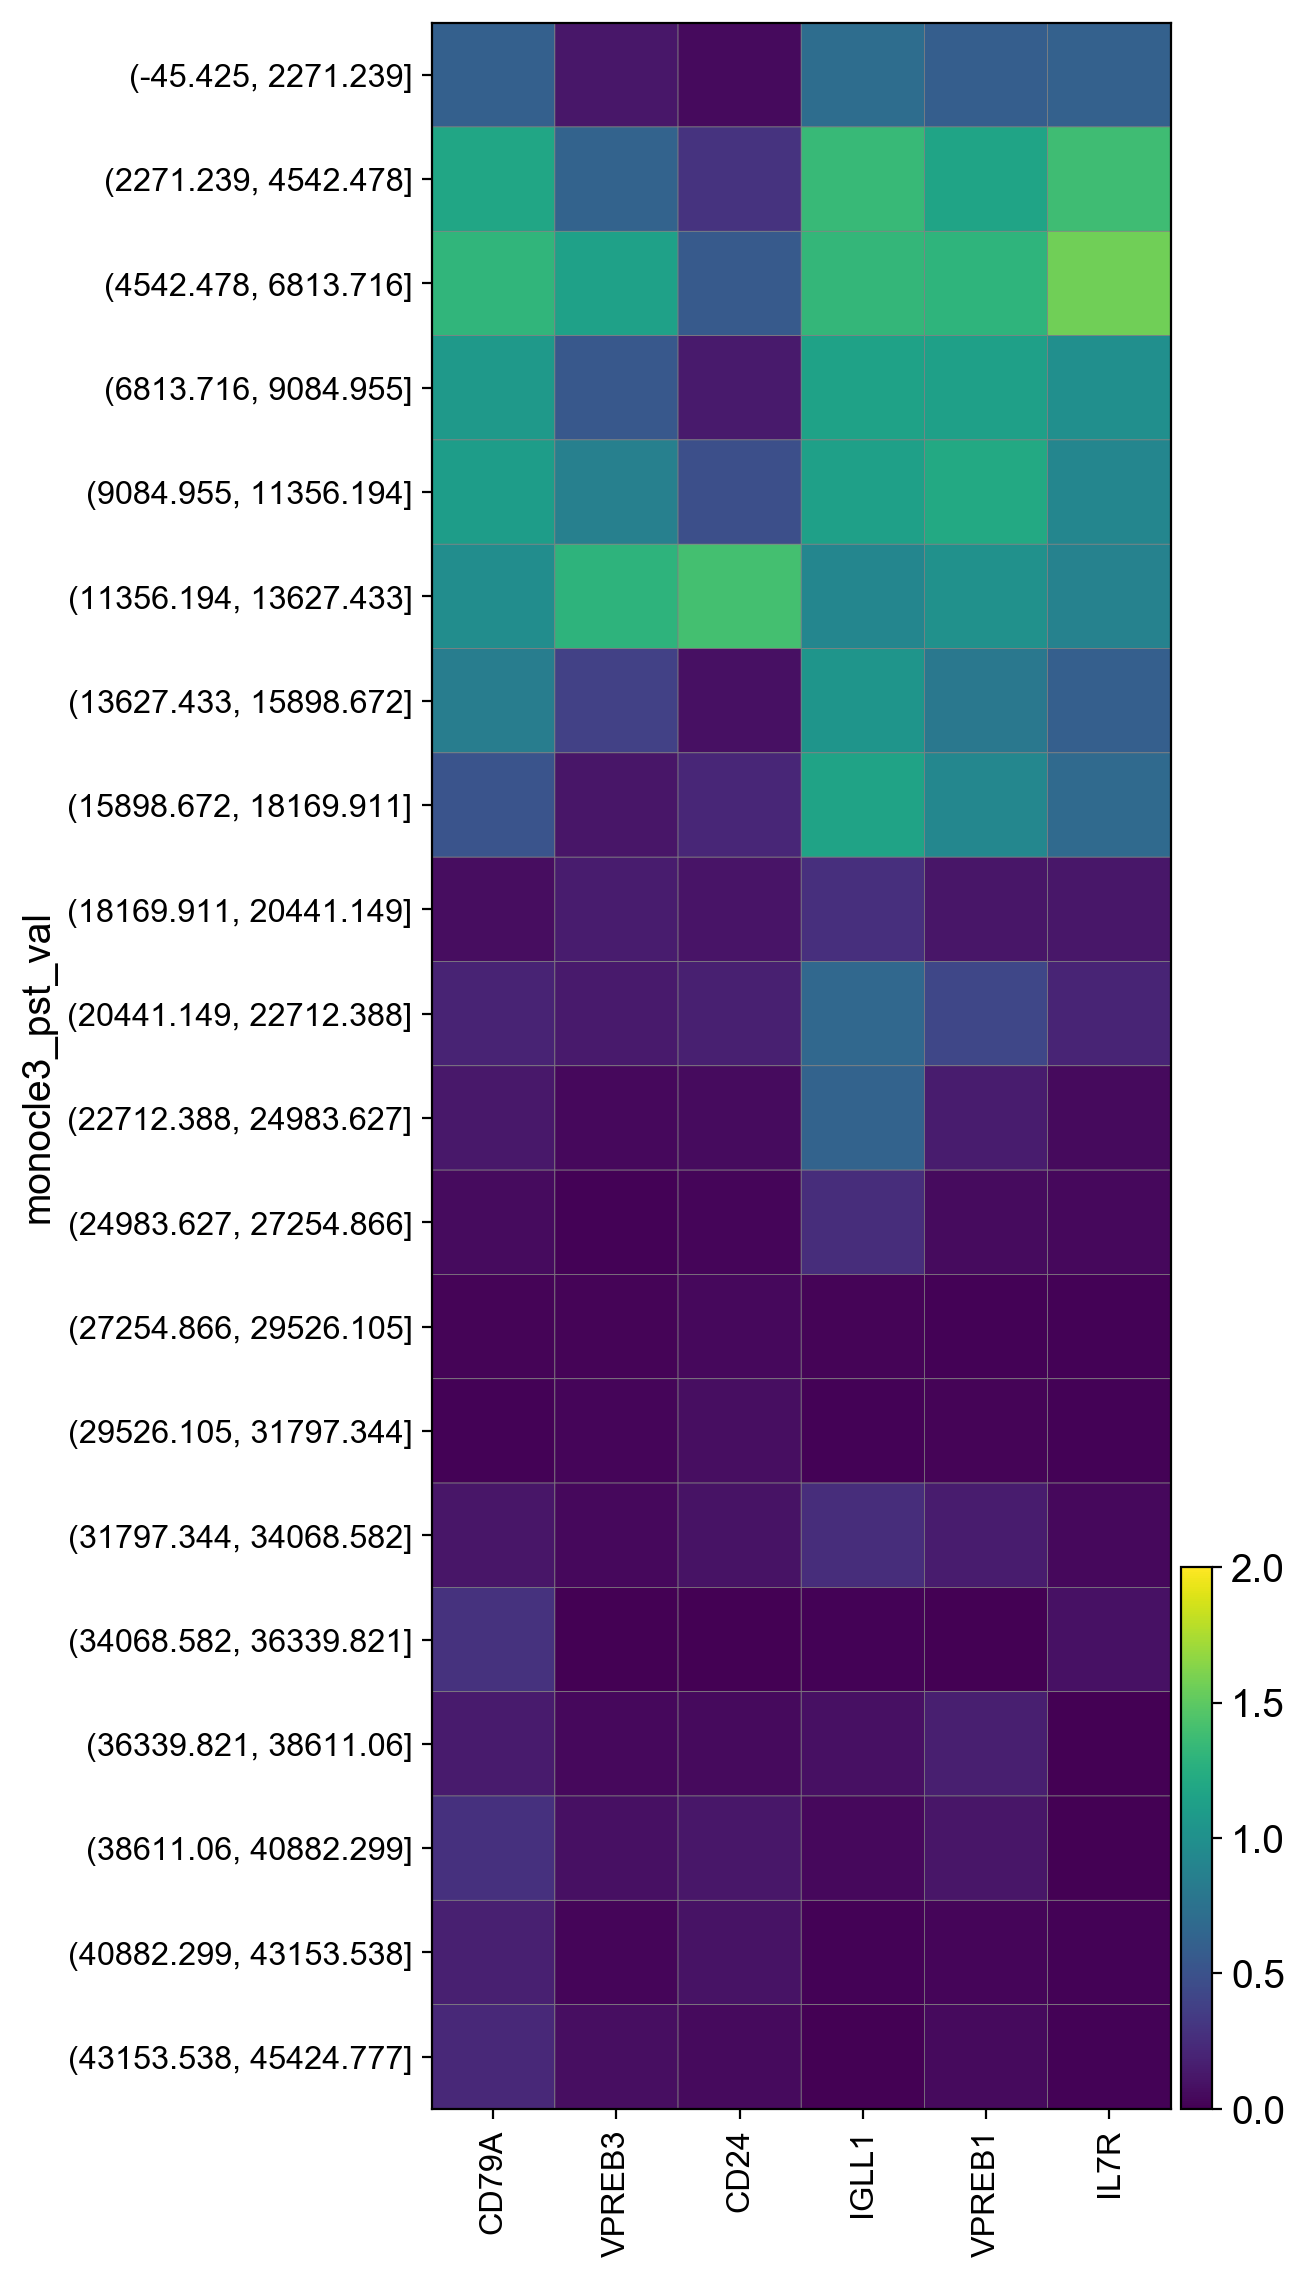

In [108]:
sc.settings.set_figure_params(dpi=100, dpi_save=1000)
gs = sc.pl.matrixplot(adata, var_names=genes_path1, save="fig2c_dc_pst_genes_path1_20200528.pdf", num_categories=20, 
                      groupby='monocle3_pst_val', swap_axes=False, use_raw=False, figsize=[5,14], vmax=2)

# Plot path 2 heatmap

In [109]:
genes = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/fig2c_dc_monocle_path2_heatmap.csv")
genes_path2 = genes["gene"].tolist()

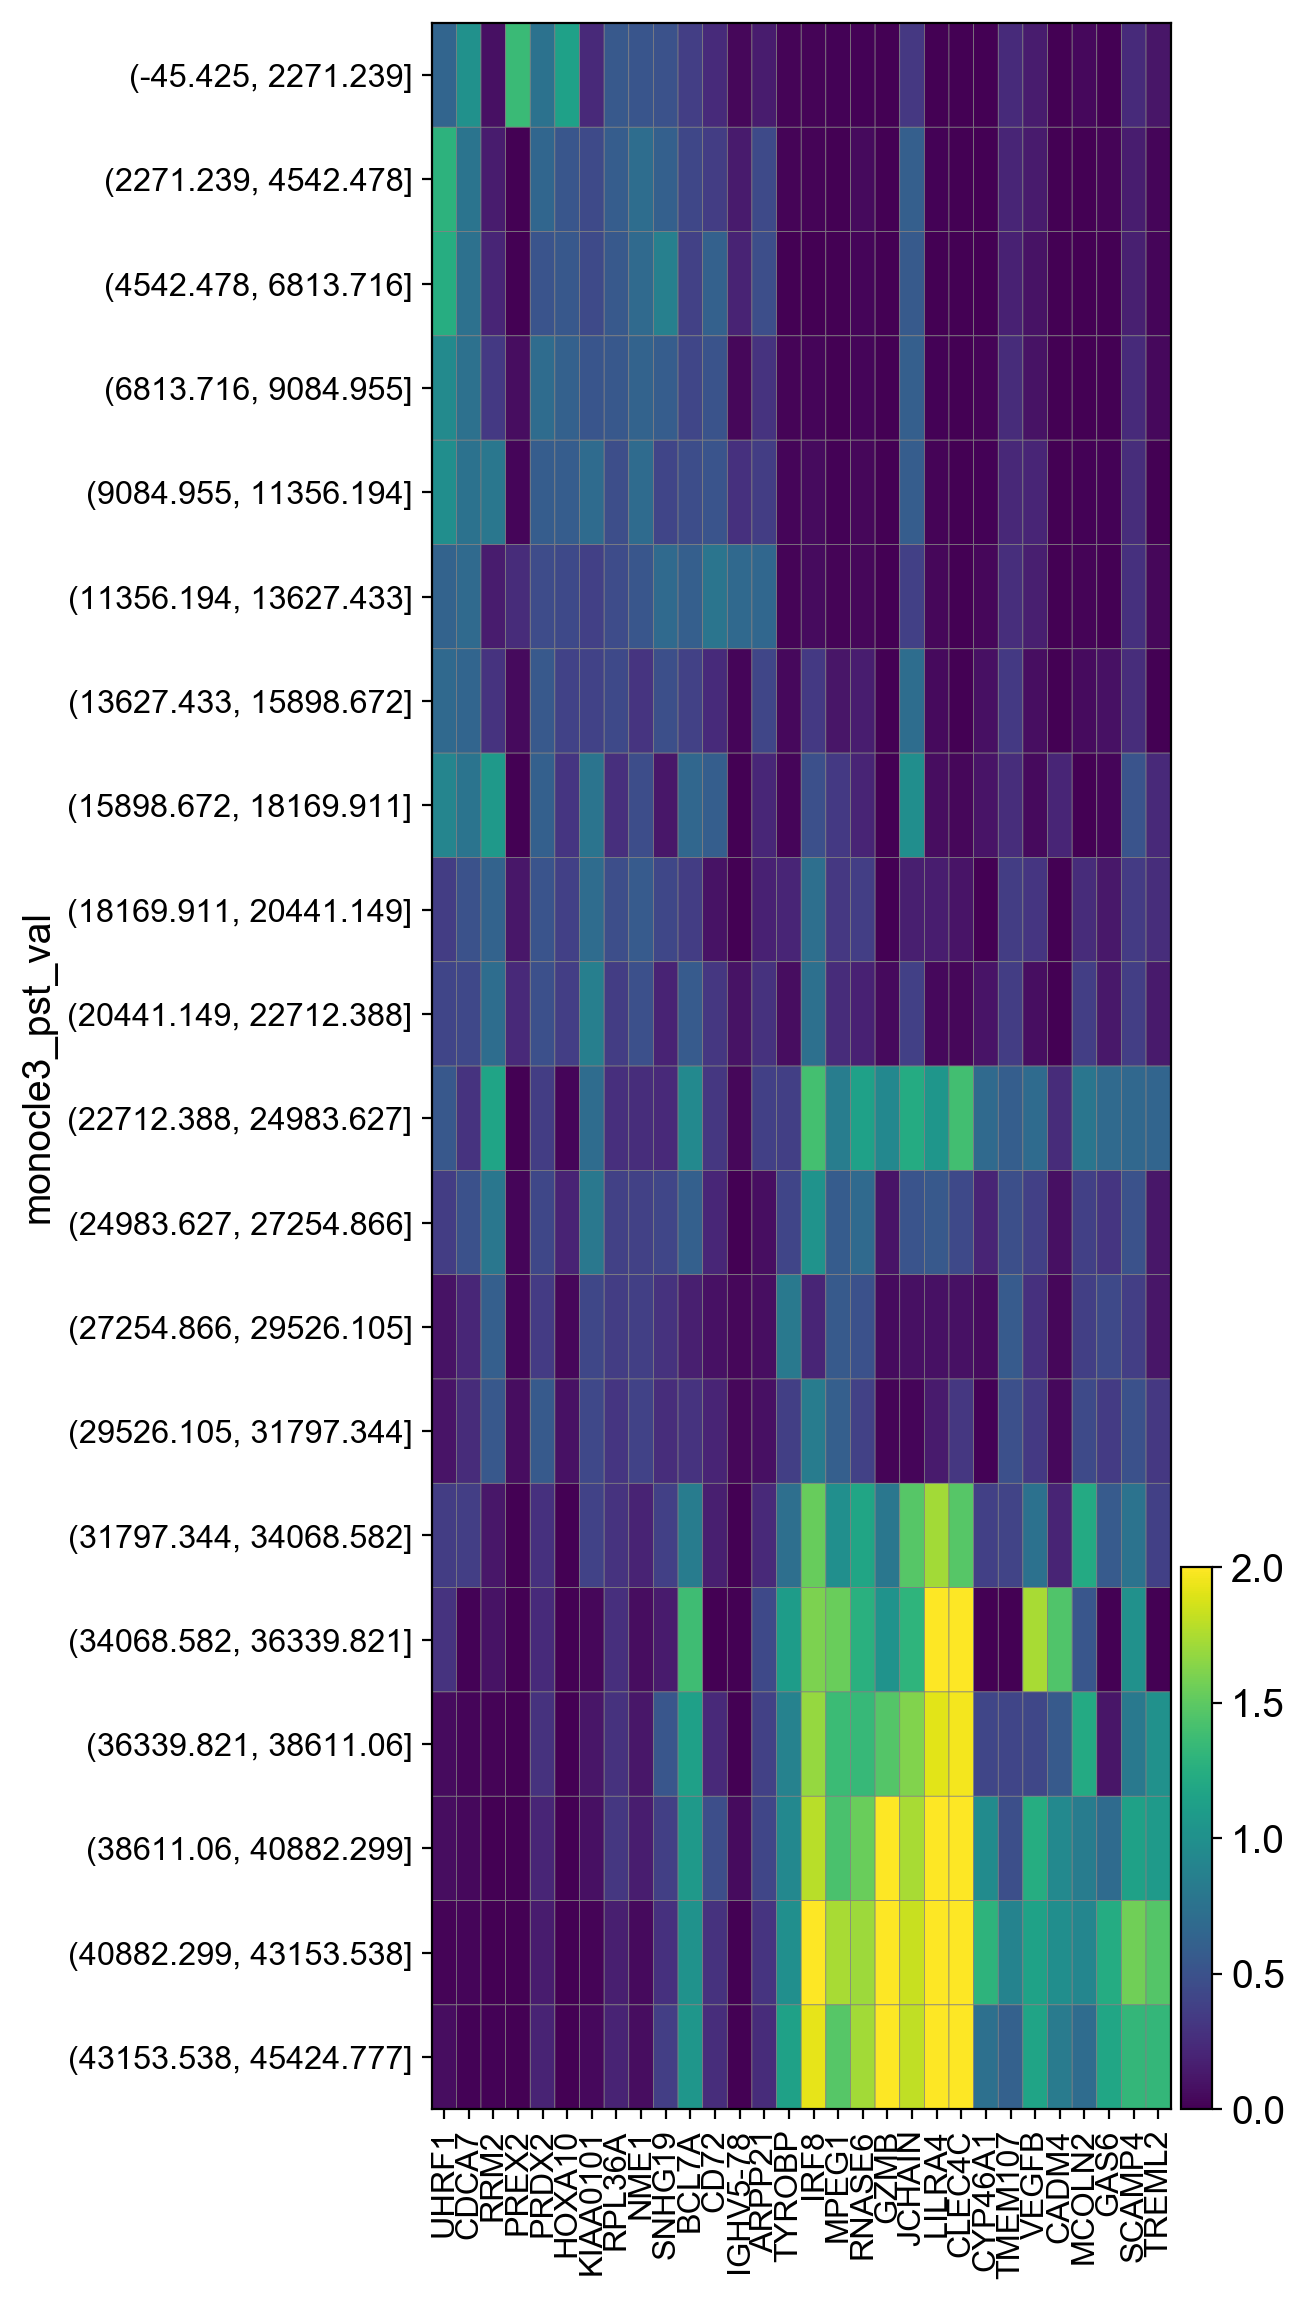

In [110]:
sc.settings.set_figure_params(dpi=100, dpi_save=1000)
gs = sc.pl.matrixplot(adata, var_names=genes_path2, save="fig2c_dc_pst_genes_path2_20200528.pdf", num_categories=20, 
                      groupby='monocle3_pst_val', swap_axes=False, use_raw=False, figsize=[5,14], vmax=2)

# Plot path 3 heatmap

In [111]:
genes = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/fig2c_dc_monocle_path3_heatmap.csv")
genes_path3 = genes["gene"].tolist()

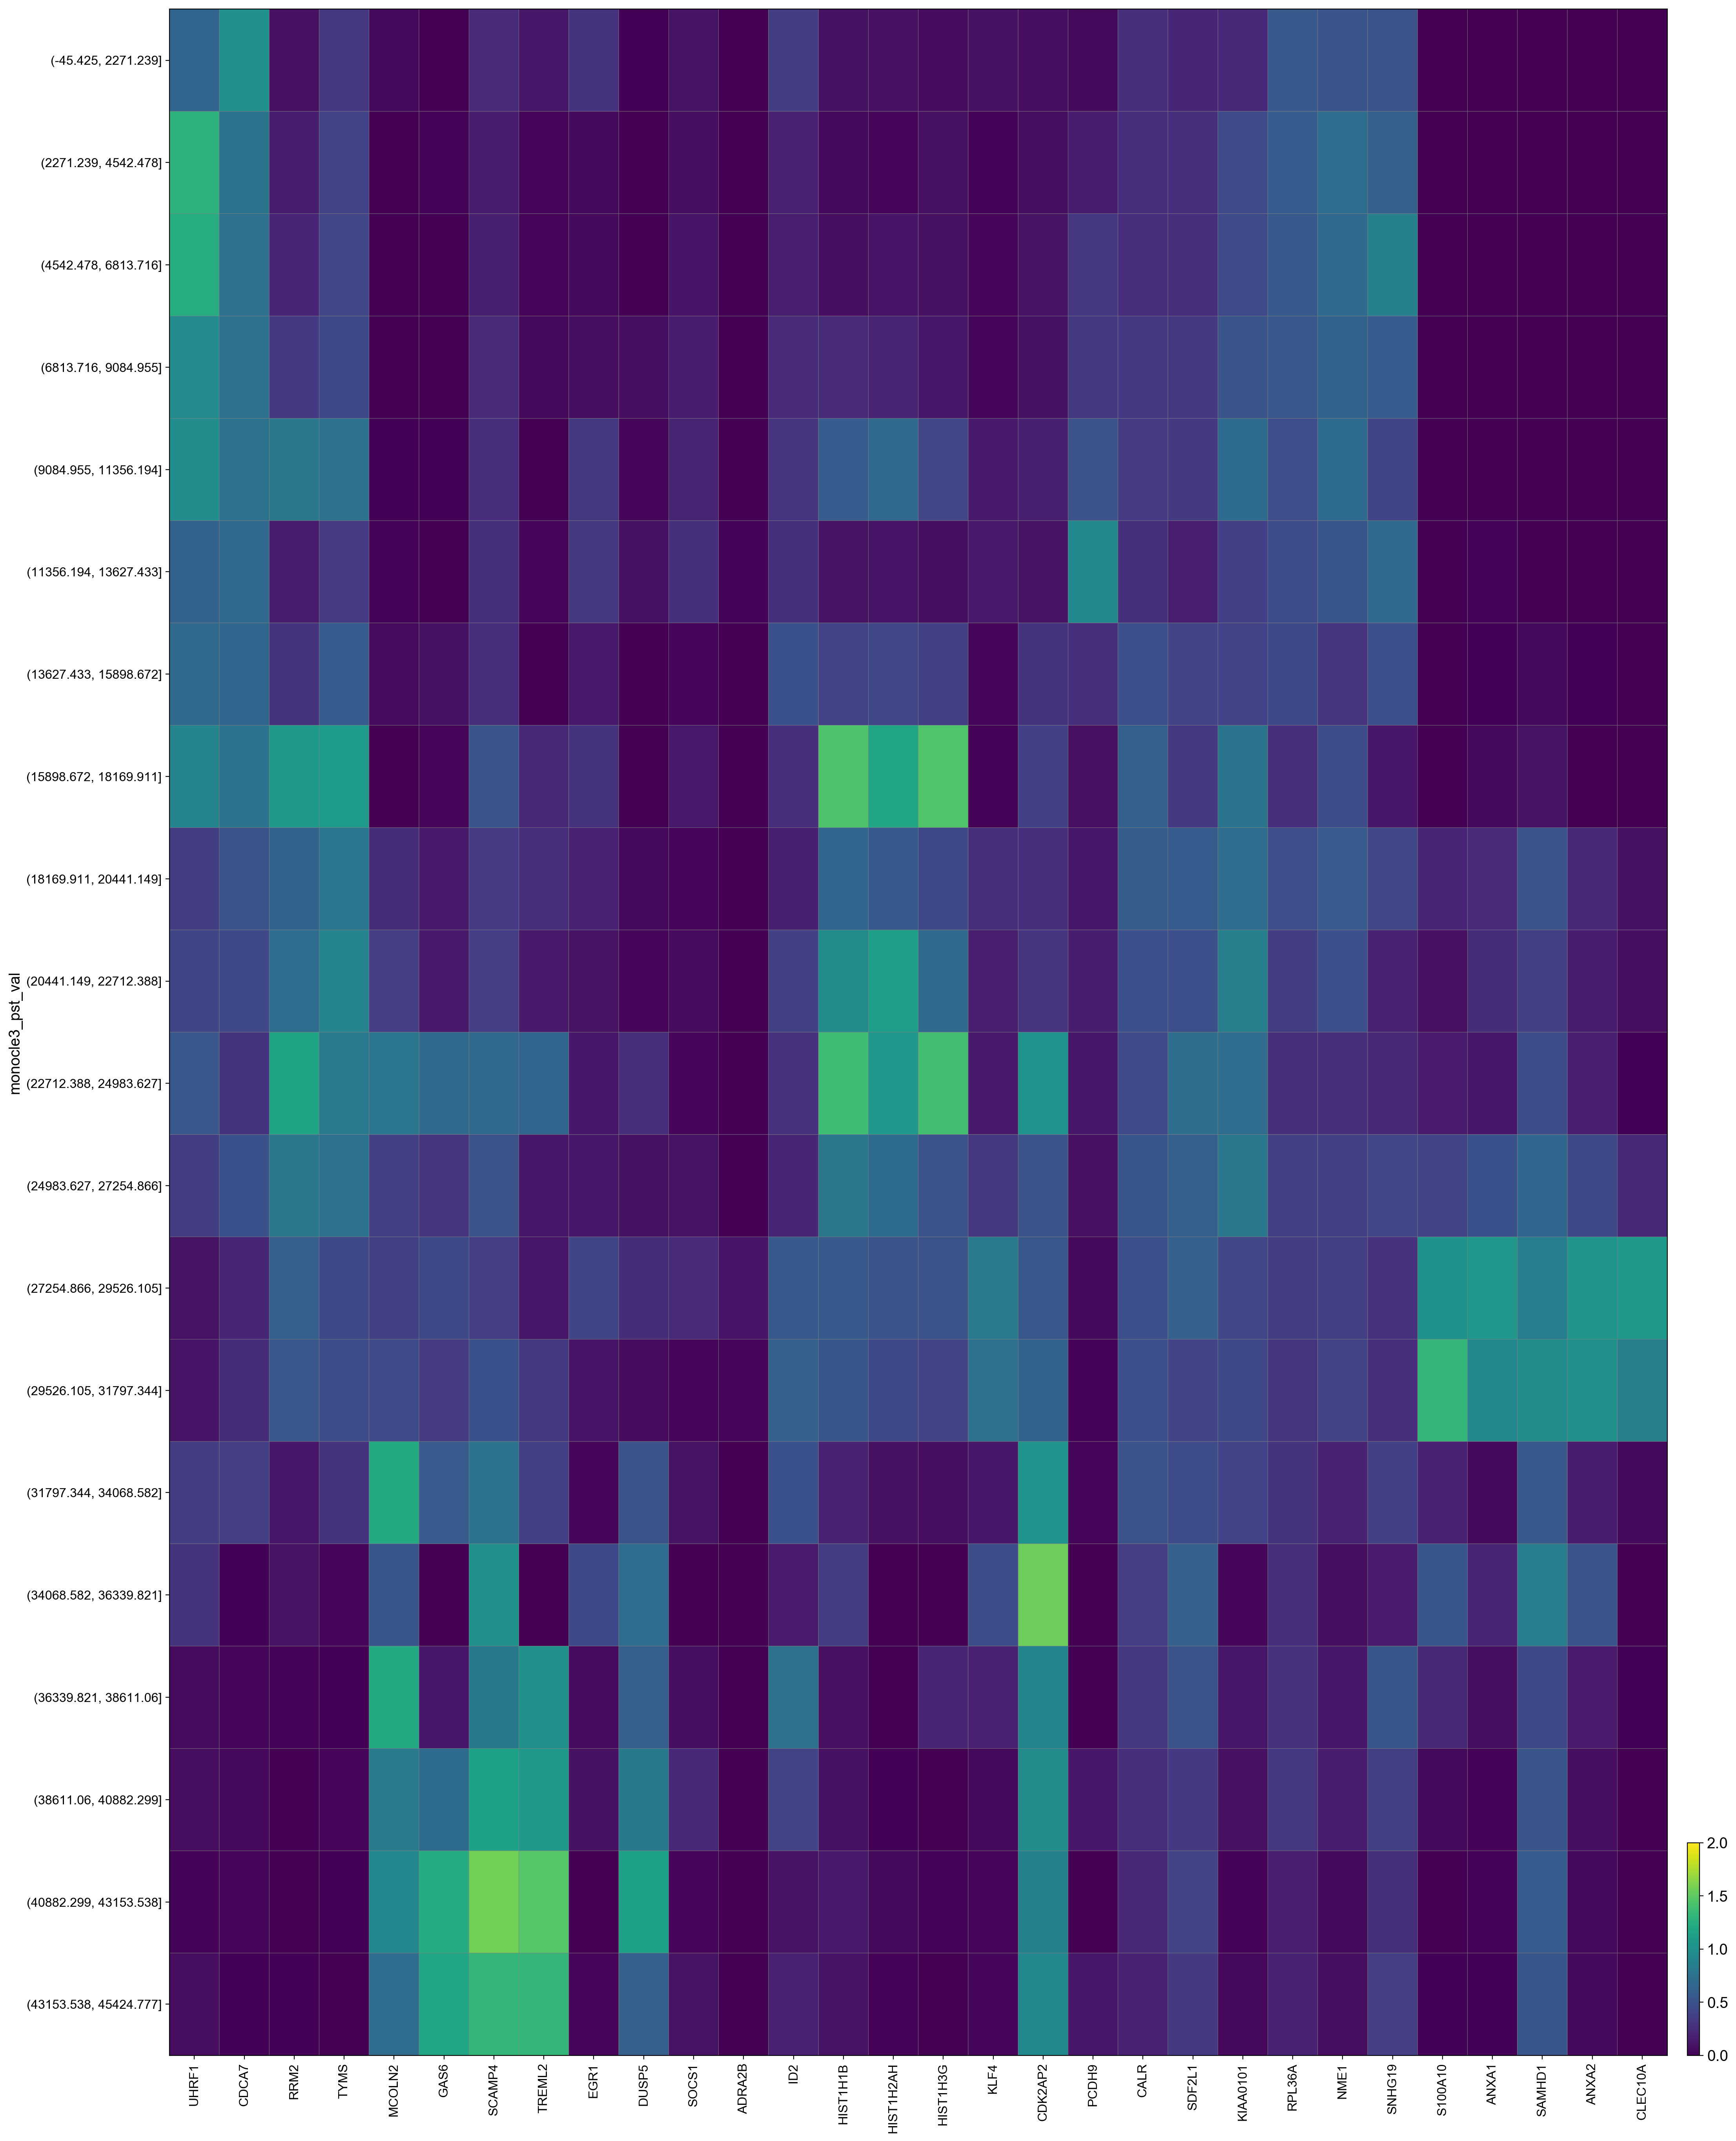

In [112]:
sc.settings.set_figure_params(dpi=100, dpi_save=1000)
gs = sc.pl.matrixplot(adata, var_names=genes_path3, save="fig2c_dc_pst_genes_path3_20200528.pdf", num_categories=20, 
                      groupby='monocle3_pst_val', swap_axes=False, use_raw=False, figsize=[25,35], vmax=2) 

# Plot all paths together (with a gap)

In [114]:
total_genes = genes_path1 + genes_path2 + genes_path3

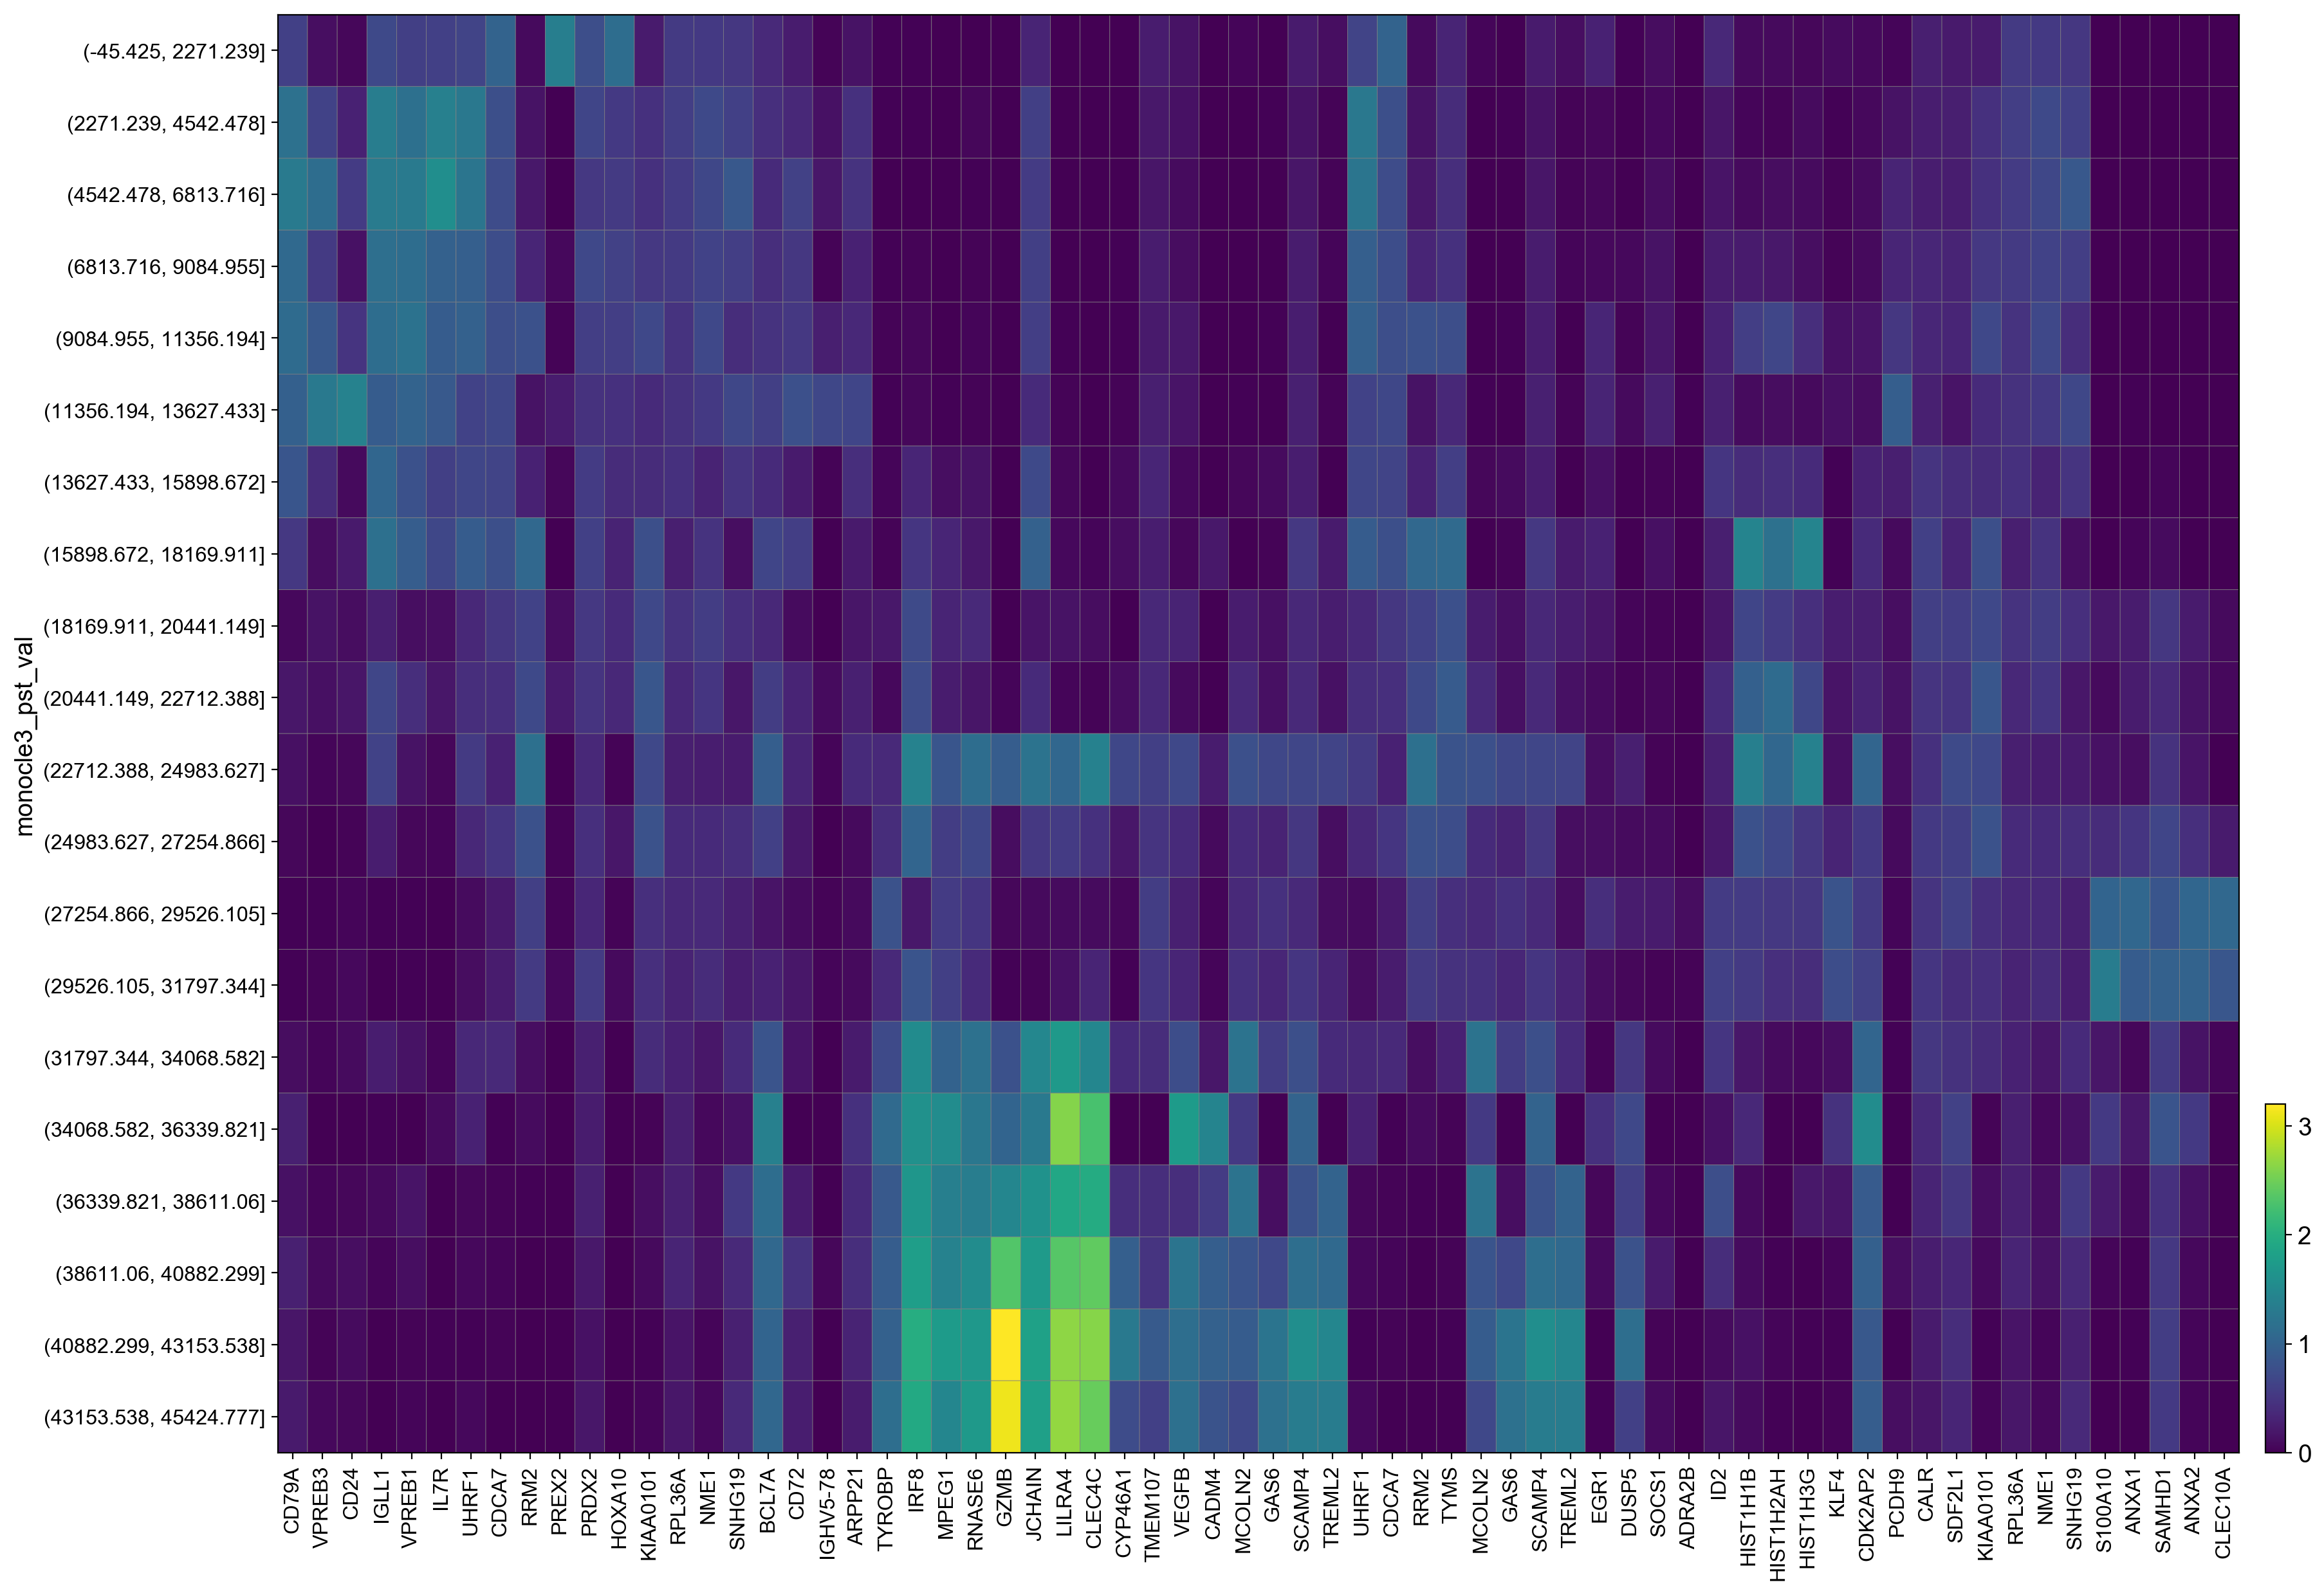

In [118]:
sc.settings.set_figure_params(dpi=100, dpi_save=1000)
gs = sc.pl.matrixplot(adata, var_names=total_genes, save="fig2c_dc_pst_genes_total_paths_20200528.pdf", 
                      num_categories=20, 
                      groupby='monocle3_pst_val', swap_axes=False, use_raw=False, figsize=[20,15]) 